# Exploratory Data Analysis

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Some related business questions we can answer using the raw data:
 - Who is more likely to default male or female? How is the hight borrower ?
 - Is the age of the applicant a contributor to defaulting ?
 - Does having a car, house or kids affect the applicant ability to repay on time ?
 - Does living in a specific area or city affect the applicant ability to repay on time ?
 - Will the occupation of the applicant affect the ability to repay on time ? What is The relation between both the income and occupation to defaulting 
 - Does having multiple previous Credit Bureau affect the ability to repay on time ?

In [5]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns

# import plotly for interactive plotting 
import chart_studio.plotly as py
import plotly.graph_objs as go

# provide support for plotly to interact with pandas
#import cufflinks as cf
#cf.go_offline()

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# display plots on the notebook itself
%matplotlib inline

## loading the datasets 

In [7]:
train = pd.read_csv("../Dataset/application_train.csv")
#application_test = pd.read_csv("../Dataset/application_test.csv")
#bureau = pd.read_csv("../Dataset/bureau.csv")
#bureau_balance = pd.read_csv("../Dataset/bureau_balance.csv")
#credit_card_balance = pd.read_csv("../Dataset/credit_card_balance.csv")
#installments_payments = pd.read_csv("../Dataset/installments_payments.csv")
#previous_application = pd.read_csv("../Dataset/previous_application.csv")
#POS_CASH_balance = pd.read_csv("../Dataset/POS_CASH_balance.csv")

In [8]:
## Lets have a look at the size of the train data
print("The application_train.csv has {} entires.".format(train.shape))

The application_train.csv has (307511, 122) entires.


In [17]:
## Lets have a look at the size of the test data
print("The application_train.csv has {} entires.".format(application_test.shape))

The application_train.csv has (48744, 121) entires.


In [9]:
## Check the stats of the train features
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Anomalies

In [49]:
(train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [50]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [82]:
(train['OWN_CAR_AGE']).describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

- We can see that we have some anomalies in the train dataset ex. CNT_CHILDREN = 19, DAYS_EMPLOYED = 365243
- Handling anomalies will be in the preprocessing step

#### Correlation

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”

In [55]:
# Find correlations with the target and sort
correlations = train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226


From correlation results EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1 has the highest negative correlation with the target so they are worth investigating as well

In [13]:
## Lets check the type of features in the train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

we could see we have 16 features that have categorical charactristics while the rest of the features are numerical

In [11]:
## Check column names: note going through HomeCredit_columns_description.csv it will help you understand the meaning behind the names
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [48]:
## Take a look at the different categories unique values
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [66]:
## Take a look at the different categories unique values
train.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

AMT_INCOME_TOTAL               2548
AMT_CREDIT                     5603
AMT_ANNUITY                   13672
AMT_GOODS_PRICE                1002
REGION_POPULATION_RELATIVE       81
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY         9
AMT_REQ_CREDIT_BUREAU_WEEK        9
AMT_REQ_CREDIT_BUREAU_MON        24
AMT_REQ_CREDIT_BUREAU_QRT        11
AMT_REQ_CREDIT_BUREAU_YEAR       25
Length: 65, dtype: int64

In [16]:
## A sanity check to see the first 5 rows
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Data Analysis

### 2.1 How is the distribution of target labels? - Did most people return on time ?

According to description of the data -"1 indicates client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 indicates all other cases".

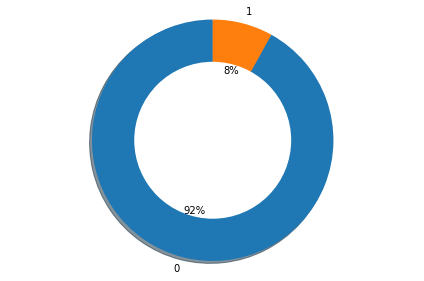

In [29]:
target_count = pd.DataFrame(train.TARGET.values.tolist()).stack().value_counts()
labels = [0,1]
plt.pie(target_count, labels=labels, autopct='%0.f%%',shadow=True, startangle=90)
circle = plt.Circle((0,0),0.65,fc='white') 
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()

We can see that our dataset is highly unbalanced with 92% of loans get repaid on time vs 8% of loans have difficulties with repaying on time

### 2.2 Who is more likely to default male or female? How is the hight borrower ?

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

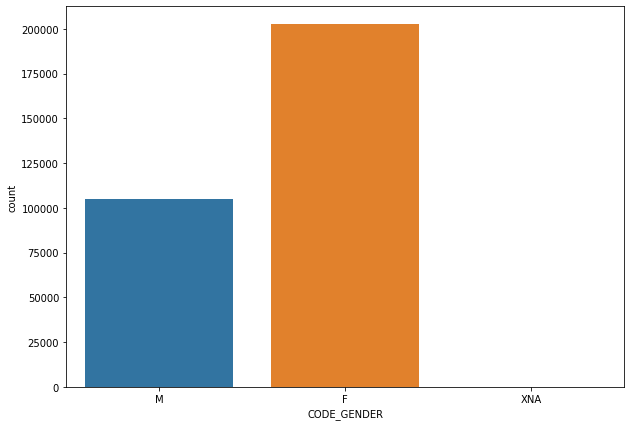

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=train)

In [20]:
print("Surprisingly, females are the highest borrowers with counts:\n{}".format(train.CODE_GENDER.value_counts()))

Surprisingly, females are the highest borrowers with counts:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


<AxesSubplot:xlabel='TARGET', ylabel='count'>

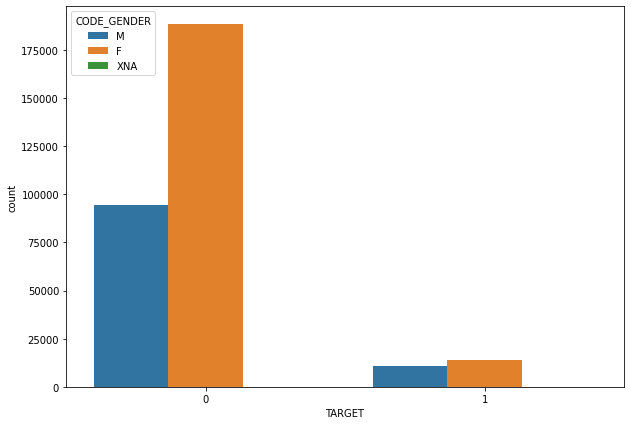

In [30]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='TARGET',hue='CODE_GENDER',data=train)

This shows that female borrower tend to default more than male borrower but this can be due to high female borrower vs male borrower

In [37]:
# get the number of people's gender and target grouped.
gender_df = pd.DataFrame(data=train.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR'])

In [38]:
# reset the multiindex organization of dataframe.
gender_df = gender_df.reset_index() 

In [45]:
# find the ratios from the array values
gender_df

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,188278
1,F,1,14170
2,M,0,94404
3,M,1,10655
4,XNA,0,4


After calculating the ratio of defaulters based on gender it turned out that 10% of all male borrowers default on contrary to 7% of all female borrower that default

### 2.3 Effect of age on repayment

In [53]:
# Find the correlation of the positive days since birth and target
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_BIRTH'].corr(train['TARGET'])

-0.07823930830982709

This negative correlation shows that with higher the applicant age he/she is more likely to repay on time more often

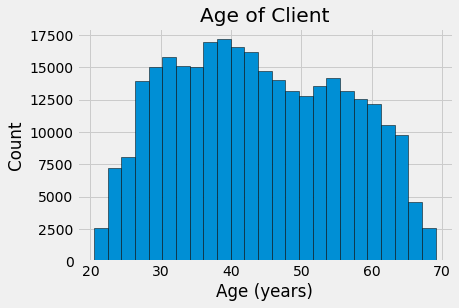

In [54]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

The above graph only shows that there is no outliers in the age of the applicants. For more information on how this feature affect the defaulting state we will use kernel density estimation plot (KDE) colored by the value of the target

Text(0.5, 1.0, 'Distribution of Ages')

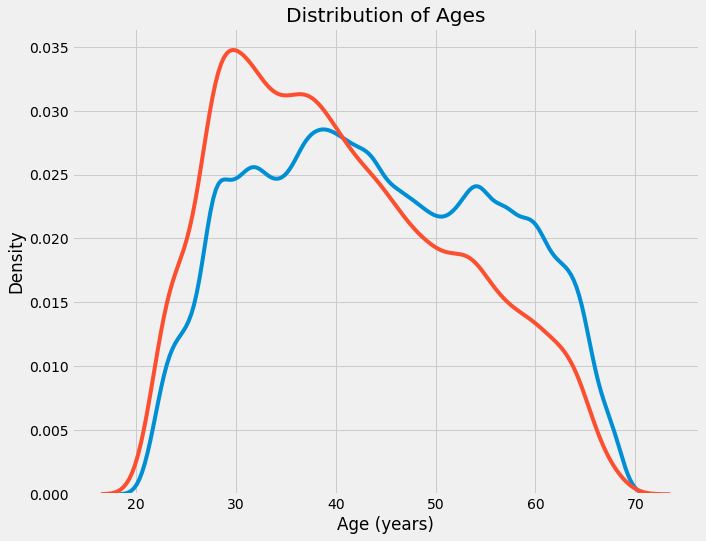

In [60]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

This graph gives us an insight that probably younger applicants tend to default more than old applicants.
We can further create age groups to be able to make an insight based on average default rate per age range.

In [69]:
# Age information into a separate dataframe
age_data = train[['TARGET', 'DAYS_BIRTH','CODE_GENDER']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data

,TARGET,DAYS_BIRTH,CODE_GENDER,YEARS_BIRTH,YEARS_BINNED
0,1,9461,M,25.920548,"(25.0, 30.0]"
1,0,16765,F,45.931507,"(45.0, 50.0]"
2,0,19046,M,52.180822,"(50.0, 55.0]"
3,0,19005,F,52.068493,"(50.0, 55.0]"
4,0,19932,M,54.608219,"(50.0, 55.0]"
...,...,...,...,...,...
307506,0,9327,M,25.553425,"(25.0, 30.0]"
307507,0,20775,F,56.917808,"(55.0, 60.0]"
307508,0,14966,F,41.002740,"(40.0, 45.0]"
307509,1,11961,F,32.769863,"(30.0, 35.0]"


In [71]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


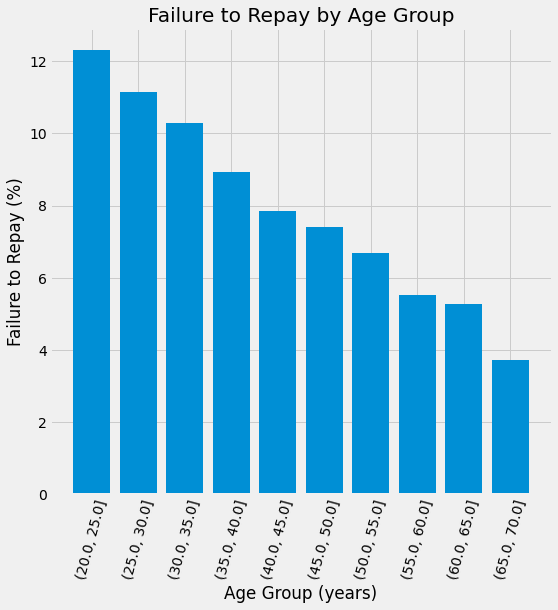

In [72]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group

<AxesSubplot:xlabel='CODE_GENDER', ylabel='YEARS_BIRTH'>

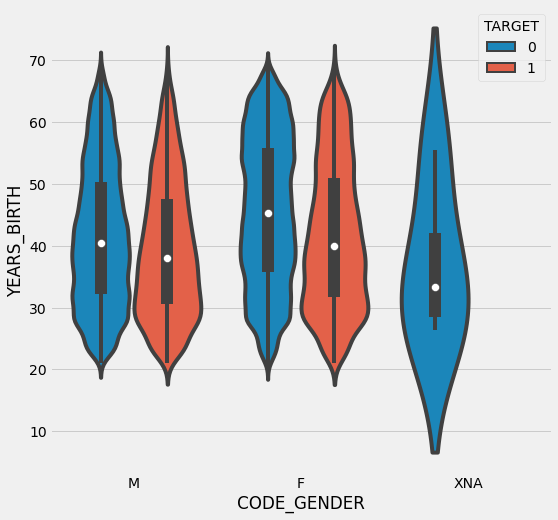

In [84]:
plt.figure(figsize = (8, 8))

sns.violinplot(data=age_data, x='CODE_GENDER', y='YEARS_BIRTH',hue='TARGET')

From the above graph we could see that younger female groups tend to default more than older female groups while in males its consistant between younger and older age groups

### 2.4 Does having a car, house or kids affect the applicant ability to repay on time ?

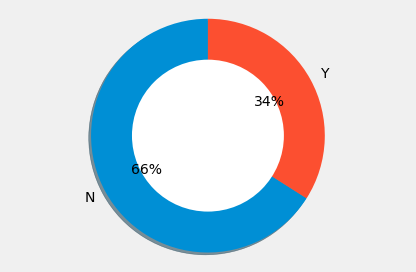

In [79]:
# Lets find the population of car owners 
target_count = pd.DataFrame(train.FLAG_OWN_CAR.values.tolist()).stack().value_counts()
labels = ['N','Y']
plt.pie(target_count, labels=labels, autopct='%0.f%%',shadow=True, startangle=90)
circle = plt.Circle((0,0),0.65,fc='white') 
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()

We can see that 34% of the applicants have cars while 66% doesn't own a car

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

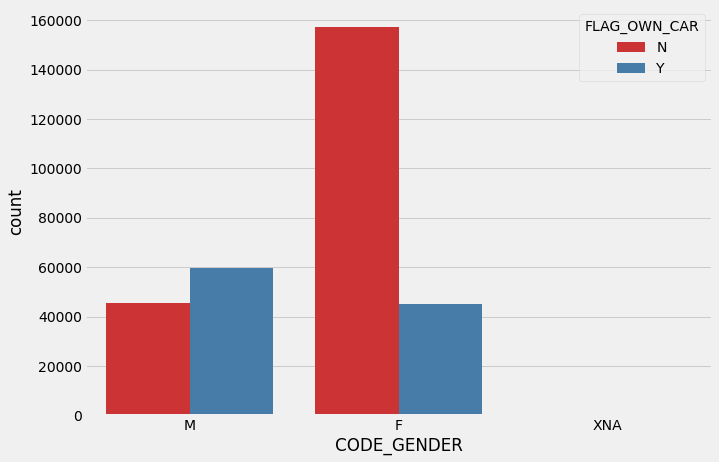

In [80]:
# lets see who has more cars female or males
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER', hue='FLAG_OWN_CAR', data=train,palette="Set1")

Male applicants tend to have more cars than female applicants. Can the age of the car affect the probability of defaulting ?

<AxesSubplot:xlabel='CODE_GENDER', ylabel='OWN_CAR_AGE'>

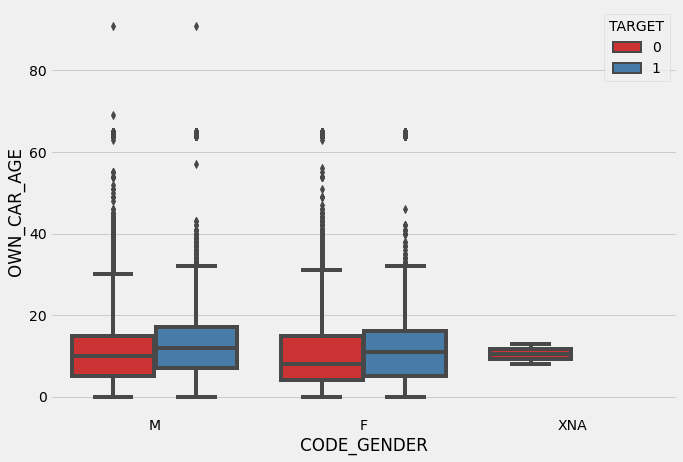

In [83]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='CODE_GENDER',y='OWN_CAR_AGE',hue='TARGET',data=train,palette="Set1")

<AxesSubplot:xlabel='CODE_GENDER', ylabel='OWN_CAR_AGE'>

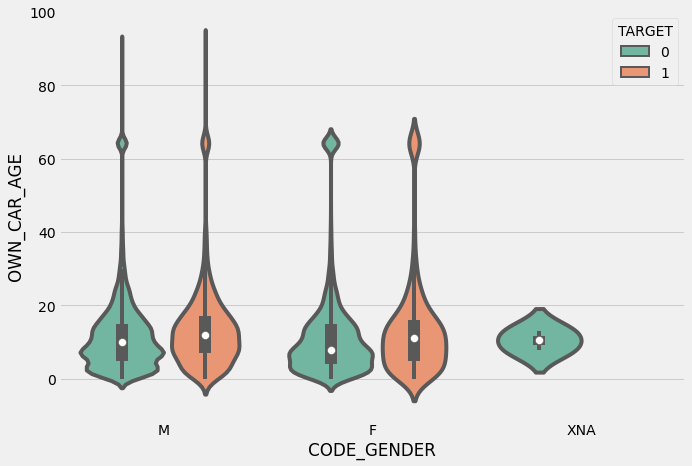

In [85]:
fig, ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='CODE_GENDER',y='OWN_CAR_AGE',hue='TARGET',data=train,palette="Set2")

<AxesSubplot:xlabel='OWN_CAR_AGE', ylabel='Density'>

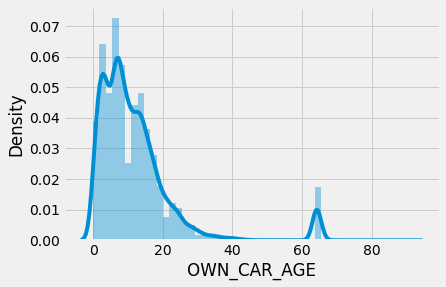

In [89]:

sns.distplot(train['OWN_CAR_AGE'].dropna(),norm_hist=False,kde=True)

People with repaying difficulty mostly have older cars. we have a spike around 60+ cars 

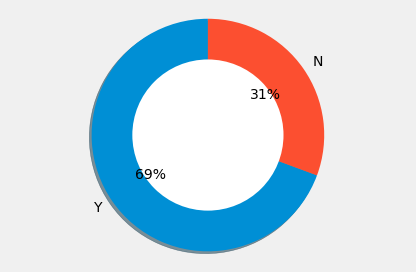

In [90]:
# Lets find the population of home owners 
target_count = pd.DataFrame(train.FLAG_OWN_REALTY.values.tolist()).stack().value_counts()
labels = ['Y','N']
plt.pie(target_count, labels=labels, autopct='%0.f%%',shadow=True, startangle=90)
circle = plt.Circle((0,0),0.65,fc='white') 
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()

From the graph above our base is split into 69% home owners vs 31% not home owners

<AxesSubplot:xlabel='TARGET', ylabel='count'>

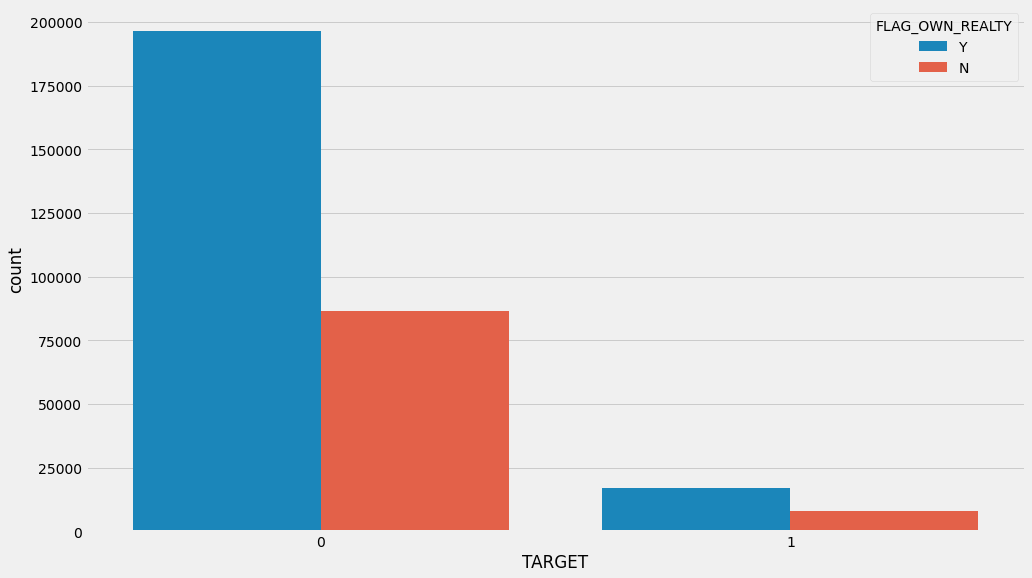

In [93]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x='TARGET',hue='FLAG_OWN_REALTY',data=train)

In [94]:
# get the number of people owning a realestate and target grouped.
home_df = pd.DataFrame(data=train.groupby(['FLAG_OWN_REALTY','TARGET']).count()['SK_ID_CURR'])
# reset the multiindex organization of dataframe.
home_df = home_df.reset_index() 
home_df

,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,N,0,86357
1,N,1,7842
2,Y,0,196329
3,Y,1,16983


In [99]:
print('Ratio of defaulters to home owners is = ',100*(16983/(16983+196329)))
print('Ratio of defaulters to non home owners is = ',100*(7842/(7842+86357)))

Ratio of defaulters to home owners is =  7.961577407740775
Ratio of defaulters to non home owners is =  8.324929139375152


Surprisingly, more defaulters are those who don't have realestate!!
We can keep digging on the realestate features to uncover insights but I will not go furthur at the moment

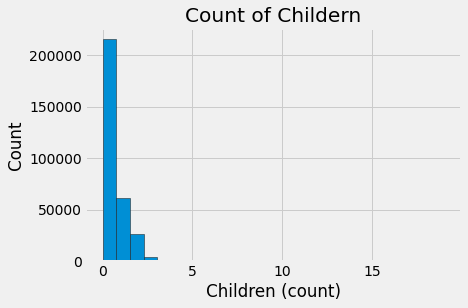

In [102]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train['CNT_CHILDREN'], edgecolor = 'k', bins = 25)
plt.title('Count of Childern'); plt.xlabel('Children (count)'); plt.ylabel('Count');

<AxesSubplot:xlabel='CODE_GENDER', ylabel='CNT_CHILDREN'>

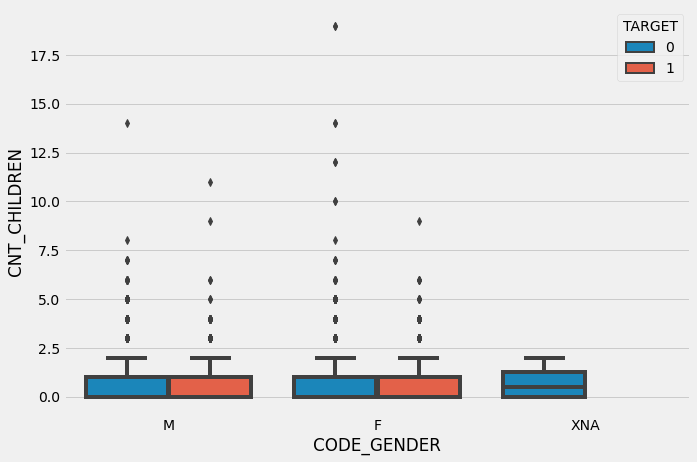

In [100]:
# Lets find the population with kids
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='CODE_GENDER',y='CNT_CHILDREN',hue='TARGET',data=train)

It seems like min children count is 0 and we may have outliers in the count of childern

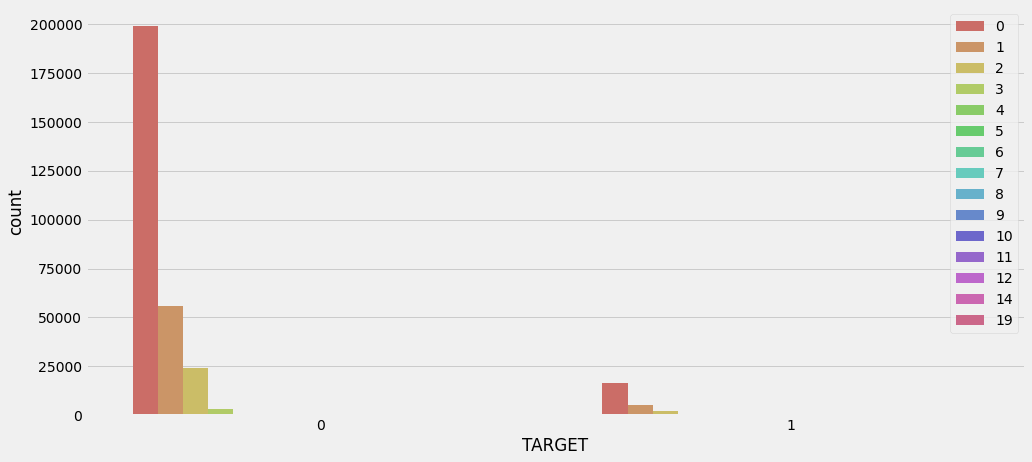

In [101]:
## lets see the effect of number of childern over repayment on time 
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=train,palette="hls")
plt.legend(loc=1)

Most borrowers who have no children had no difficulties repaying - having children impacts the repayment process - it slows down by making it difficult for the client

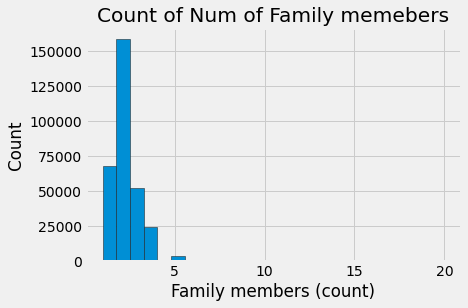

In [103]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train['CNT_FAM_MEMBERS'], edgecolor = 'k', bins = 25)
plt.title('Count of Num of Family memebers'); plt.xlabel('Family members (count)'); plt.ylabel('Count');

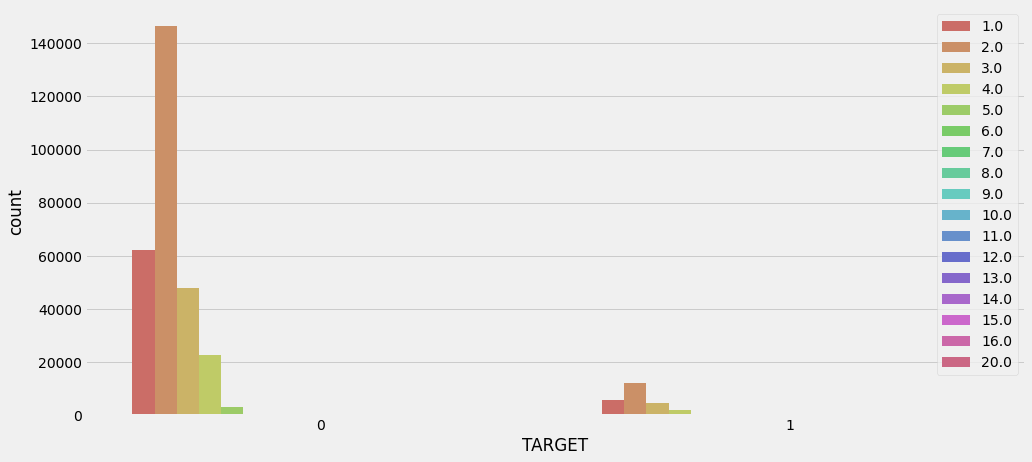

In [104]:
## lets see the effect of number of family members over repayment on time 
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='TARGET',hue='CNT_FAM_MEMBERS',data=train,palette="hls")
plt.legend(loc=1)

From this graph above applicants with 2 family members have more difficulties in repaying on time!. Mainly because the majority of the applicants have 2 family members 

### 2.5 Does living in a specific area or city affect the applicant ability to repay on time ?

Both REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY have the highest positive correlation with target variable 

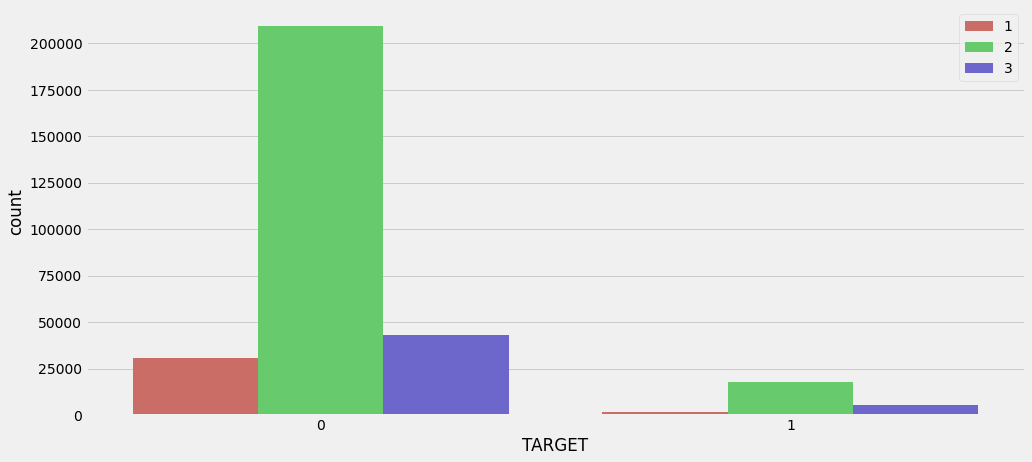

In [106]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='TARGET',hue='REGION_RATING_CLIENT',data=train,palette="hls")
plt.legend(loc=1)

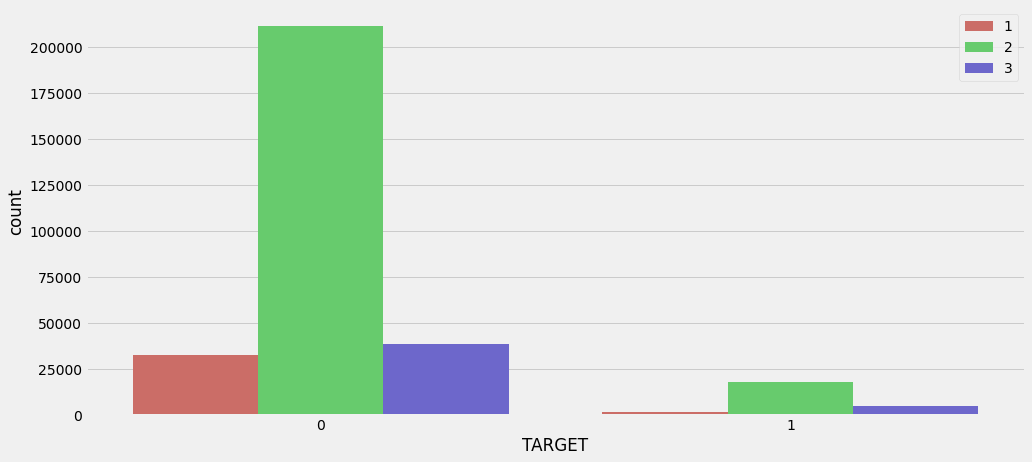

In [107]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='TARGET',hue='REGION_RATING_CLIENT_W_CITY',data=train,palette="hls")
plt.legend(loc=1)

Text(0.5, 1.0, 'Distribution of Region population ratio')

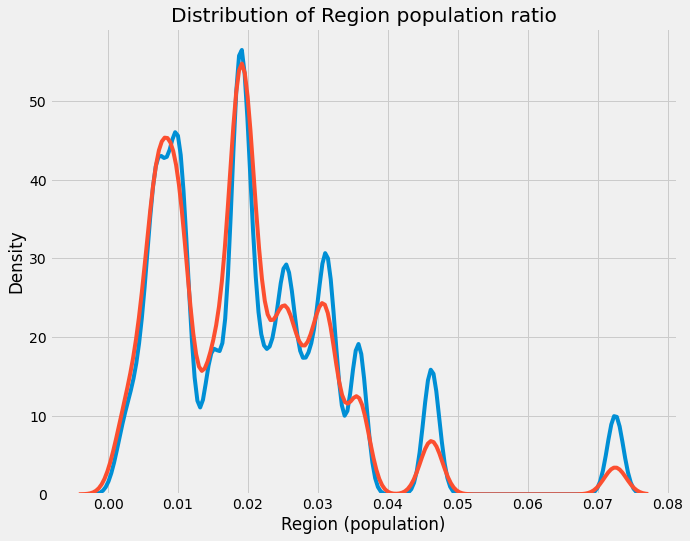

In [109]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0, 'REGION_POPULATION_RELATIVE'] , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'REGION_POPULATION_RELATIVE'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Region (population)'); plt.ylabel('Density'); plt.title('Distribution of Region population ratio')

From the above graph we can say that the higher the population area the less likely for applicants to default on their payment also most of our applicants live in a less crowded regions

### 2.6 Will the occupation of the applicant affect the ability to repay on time ? What is The relation between both the income and occupation to defaulting

##### Who are the major borrowers? - What are their occupations?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

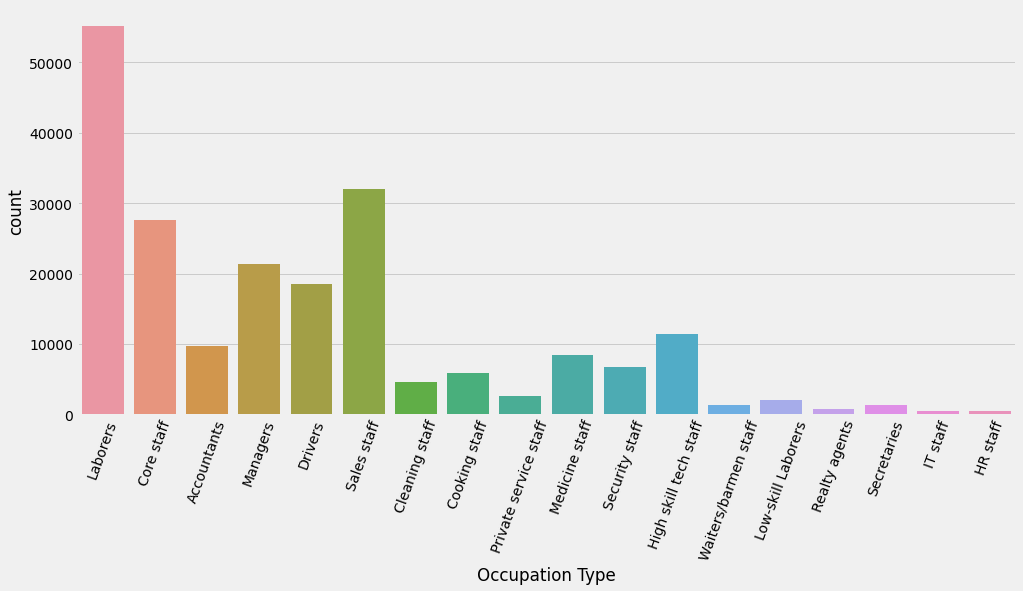

In [110]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=train)
plt.xlabel("Occupation Type")
plt.xticks(rotation=70)

Most of the clients are laborers and the least of the clients are IT Staff

##### How economically stable are clients? Who are the most and least stable?

Text(0, 0.5, 'Average Annual family income')

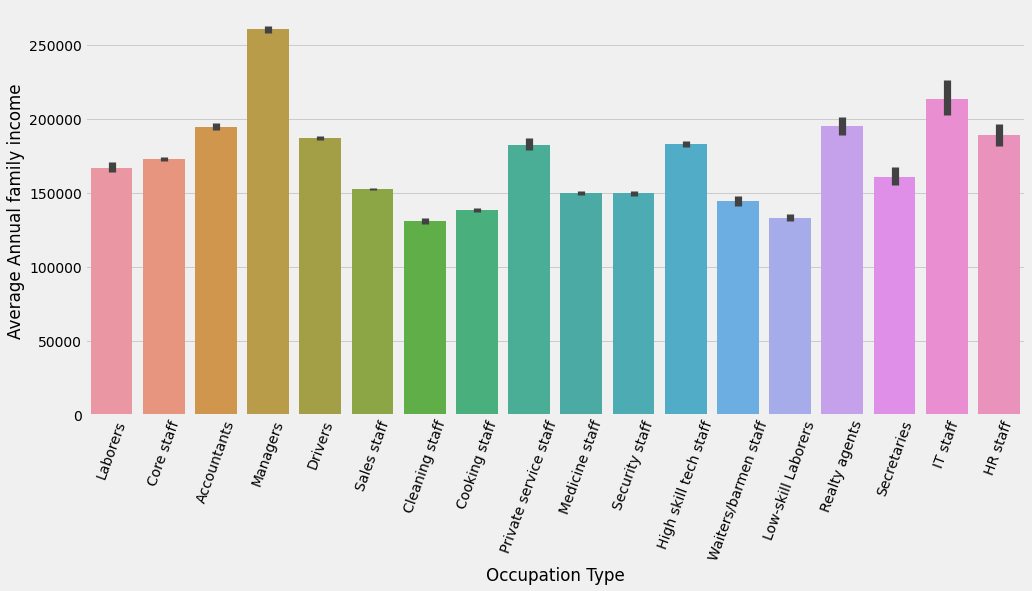

In [111]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=train)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")

Managers are the most earning borrowers while cleaning staff are the least earning borrowers - Based on the annual family income

##### Which category of occupants repay on time and are better clients for company to lend money ?

Text(0.5, 0, 'Occupation Type')

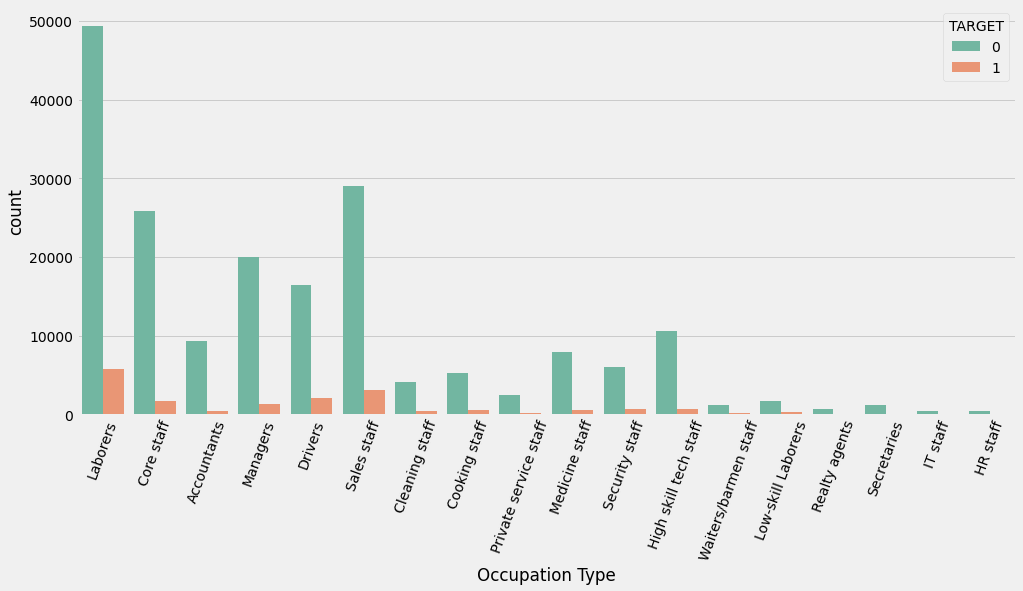

In [112]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data=train,palette="Set2")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")

It seems as if the labourers have the highest difficulty in repaying. Also it seems lending to Reality agents, IT staff, HR staff is the safest.
This is not a better way to conclude, because this contains baised number of applicants. A better way is to find a metric that incorporates relative relationship between applicants count and repayers count

In [113]:
# get the number of people having occupation type and target grouped.
Occupation_df = pd.DataFrame(data=train.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR'])

In [114]:
# reset the multiindex organization of dataframe.
Occupation_df = Occupation_df.reset_index() 

In [115]:
# get the number of people grouped on type of occupation and target in an array form.
value_counts = Occupation_df['SK_ID_CURR'].values

In [116]:
def repayers_to_applicants_ratio(values):
    """
    Finds the ratio of Repayers to Applicants. This kind of is a 
    measure for safety. Larger the value better the applicant - More 
    safe for the company to lend loan to this category of workers.
    
    values: array of entires whose counts are given
    returns the repayers to applicants ratio. 
    
    precondition: The counts are such that the targets alligned are
    in order 0 and 1
    """
    flag = 1
    ratios = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            ratios.append(current_number/(current_number+next_number))
            ratios.append(current_number/(current_number+next_number))
        flag=flag*-1
    return ratios        

In [117]:
# find the ratios from the array values
Occupation_df['Ratio R/A'] = repayers_to_applicants_ratio(value_counts)

In [118]:
# get the ratio and values based on the order of saftety.

Occupation_ratio_df = Occupation_df.groupby(['OCCUPATION_TYPE','Ratio R/A']).count().drop(['TARGET', 'SK_ID_CURR'],axis=1)
Occupation_ratio_df = Occupation_ratio_df.reset_index() 
Occupation_ratio_df = Occupation_ratio_df.sort_values(['Ratio R/A'],ascending=False)
Occupation_ratio_df

,OCCUPATION_TYPE,Ratio R/A
0,Accountants,0.951697
6,High skill tech staff,0.938401
10,Managers,0.937860
3,Core staff,0.936960
5,HR staff,0.936057
7,IT staff,0.935361
12,Private service staff,0.934012
11,Medicine staff,0.932998
15,Secretaries,0.929502
13,Realty agents,0.921438


Text(0, 0.5, 'Mean R/A Ratio')

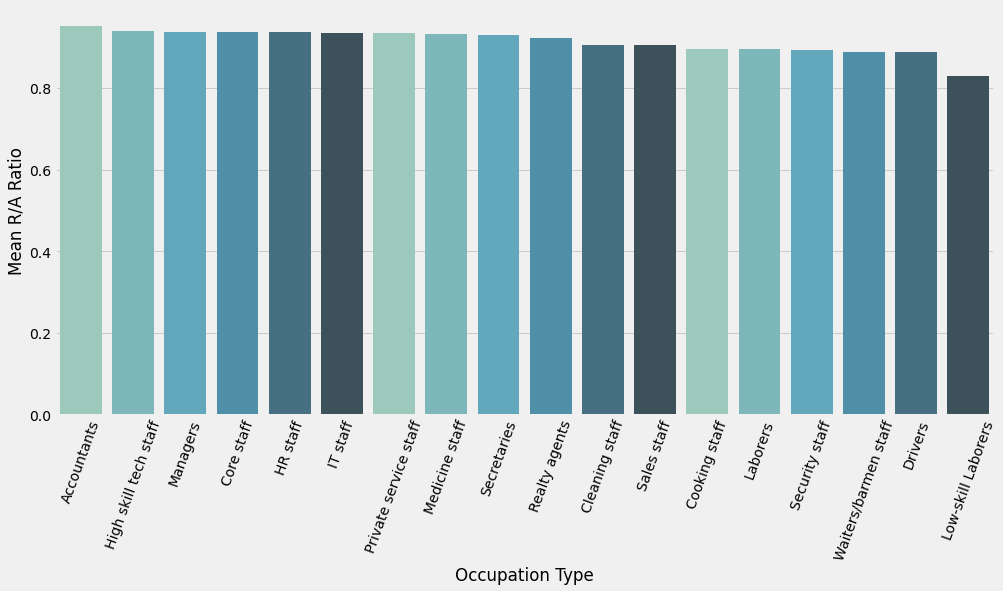

In [119]:
# explore occupation type and occupation and occupation based repayment to applicants ratio.
fig,ax = plt.subplots(figsize = (15,7))
sns.barplot(x='OCCUPATION_TYPE',y='Ratio R/A',data=Occupation_ratio_df,palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Mean R/A Ratio")

According to the ratio of Number of repayers to Number of applicants in every occupation type, we see that it is most safe to lend money to Accountants with an R/A ratio of 0.9516 and it is least safe to lend money to low skilled labourers with an R/A ratio of 0.8284

##### How is the distribution of males and females in terms of loan safety given that they belong to a specific occupation ?

In [120]:
# merge the new column 'Ratio R/A' to the train dataframe.
train = pd.merge(left=train,right=Occupation_ratio_df,on='OCCUPATION_TYPE')

Text(0.5, 0, 'Gender')

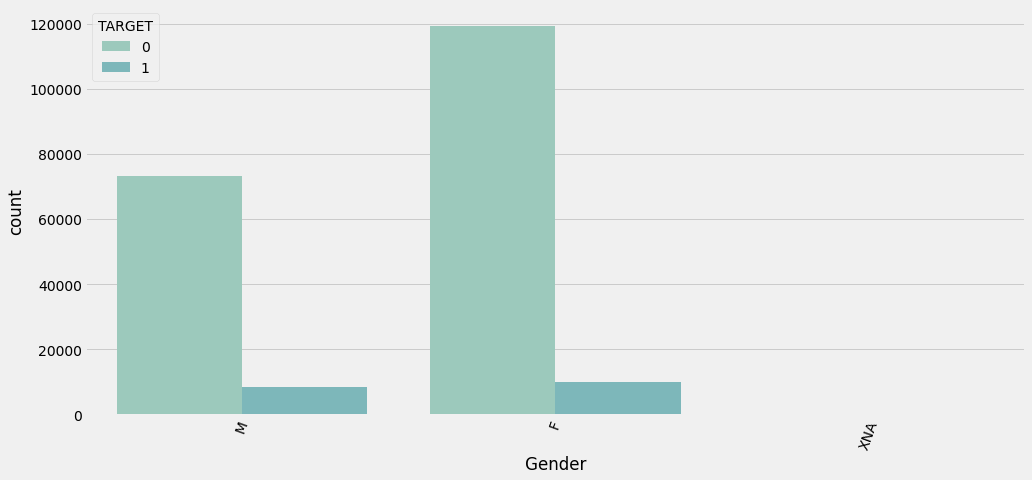

In [121]:
# Find out what is the probability that an applicant will return given that he/she is a male/Female respectively.
fig,ax = plt.subplots(figsize = (15,7))
sns.countplot(x='CODE_GENDER',data=train,hue='TARGET',palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Gender")

In [122]:
# Find out what is the probability that an applicant will return given that he/she is a male/Female respectively.
pd.DataFrame(train.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index()

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,119311
1,F,1,9971
2,M,0,73260
3,M,1,8576
4,XNA,0,2


In [123]:
### To find out the probability here's what we have to do:
print("probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952") 
print("probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228")

probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952
probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228


In [124]:
# Let us create a new dataframe where the probabilites of repaying based on gender is included. GR/A stands
# for Gender based repayment ratio.
gender_repay_ratio = pd.DataFrame({"CODE_GENDER":['M','F'],"GR/A":[0.8952,0.9228]})

In [125]:
# Merge this dataframe with the old train dataframe
train = pd.merge(left=train,right=gender_repay_ratio,on='CODE_GENDER')

In [126]:
# lets create a new column that's indicative of repayment with gender and occupation type which is just the product of Ratio R/A with G R/A.
# EGR/A stands for employment gender repayment ratio.
train['EGR/A'] = train['Ratio R/A']*train['GR/A']

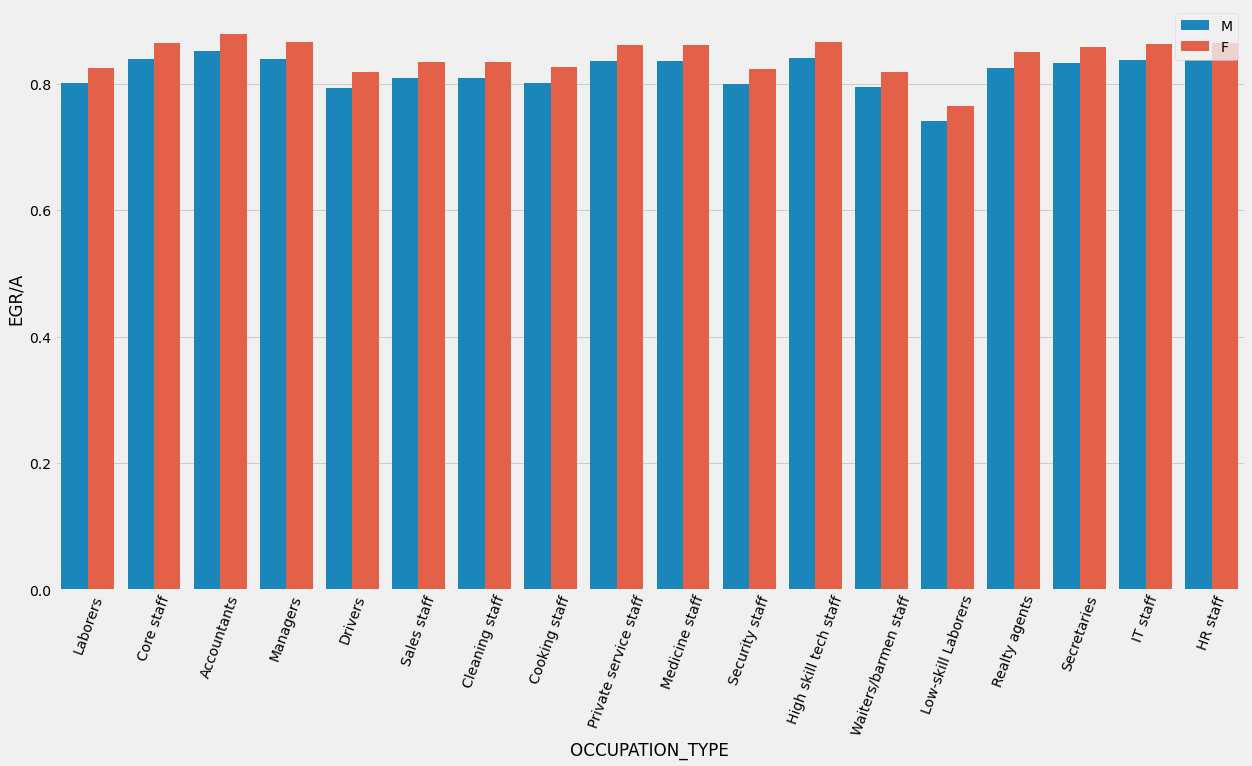

In [127]:
fig,ax = plt.subplots(figsize = (19,10))
plt.xticks(rotation=70)
sns.barplot(x='OCCUPATION_TYPE',y='EGR/A',hue='CODE_GENDER',data=train)
plt.legend(loc=1)

So, in every occupation type, females are more likely to repay the loan on time.

### 2.7 Does having multiple previous Credit Bureau affect the ability to repay on time ?

In [128]:
## Loading bureau data to extract information regarding previous loans
bureau = pd.read_csv("../Dataset/bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [129]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [130]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [131]:
# Join to the training dataframe
train = train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Ratio R/A,GR/A,EGR/A,previous_loan_counts
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.894212,0.8952,0.800499,8.0
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.894212,0.8952,0.800499,2.0
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,1.0,1.0,0.894212,0.8952,0.800499,3.0
3,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.894212,0.8952,0.800499,0.0
4,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.894212,0.8952,0.800499,2.0


-0.01826613434104915

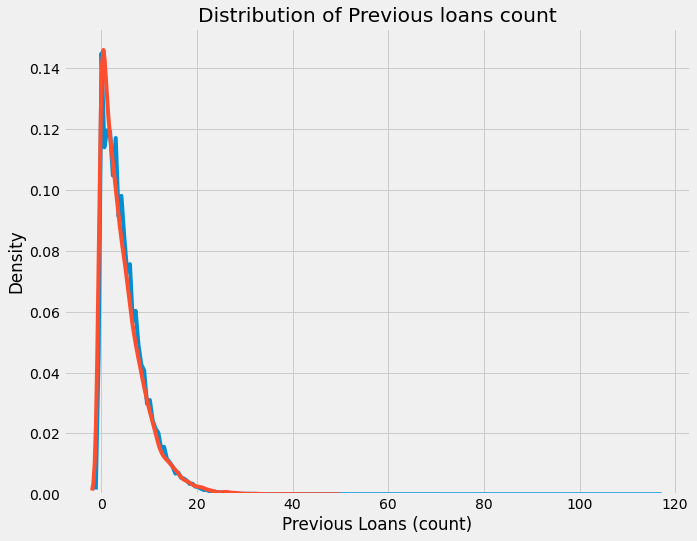

In [136]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0, 'previous_loan_counts'] , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'previous_loan_counts'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Previous Loans (count)'); plt.ylabel('Density'); plt.title('Distribution of Previous loans count')

train['previous_loan_counts'].corr(train['TARGET'])

We can't conclude if this feature has an effect over the repayment target 

### 2.8 Investigating EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

In [138]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.154997,-0.171307,-0.180326,-0.065902
EXT_SOURCE_1,-0.154997,1.000000,0.231369,0.169719,0.558421
EXT_SOURCE_2,-0.171307,0.231369,1.000000,0.121300,0.153788
EXT_SOURCE_3,-0.180326,0.169719,0.121300,1.000000,0.177927
DAYS_BIRTH,-0.065902,0.558421,0.153788,0.177927,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

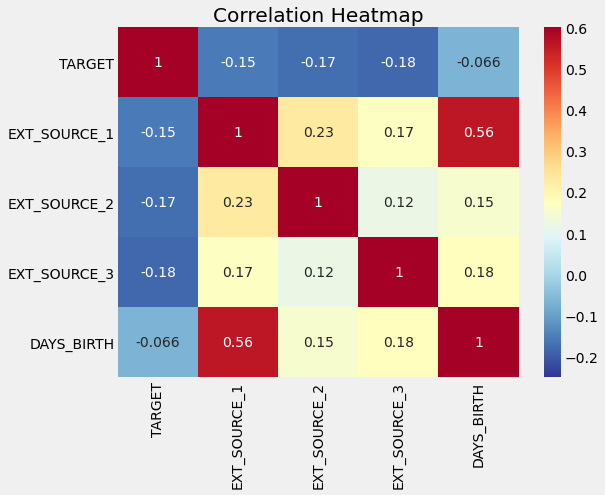

In [139]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.